In [ ]:
import pandas as pd

import os
os.listdir()

df = pd.read_csv("RELIANCE_with_indicators_.csv")

# List of columns to delete
columns_to_delete = ['sma5', 'sma10', 'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20',
                     'upperband', 'middleband', 'lowerband', 'HT_TRENDLINE', 'KAMA10',
                     'KAMA20', 'KAMA30', 'SAR', 'TRIMA5', 'TRIMA10', 'TRIMA20', 'ADX5',
                     'ADX10', 'ADX20', 'APO', 'CCI5', 'CCI10', 'CCI15', 'macd510', 'macd520',
                     'macd1020', 'macd1520', 'macd1226', 'MOM10', 'MOM15', 'MOM20', 'ROC5',
                     'ROC10', 'ROC20', 'PPO', 'RSI14', 'RSI8', 'slowk', 'slowd', 'fastk',
                     'fastd', 'fastksr', 'fastdsr', 'ULTOSC', 'WILLR', 'ATR', 'Trange',
                     'TYPPRICE', 'HT_DCPERIOD', 'BETA']

# Drop the specified columns
df = df.drop(columns=columns_to_delete)

# Save the modified DataFrame to a new CSV file
df.to_csv("RELIANCE_with_indicators_modified.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten

# Load the datasets
df_april = pd.read_csv("RIL_5min_April20.csv")
df_may = pd.read_csv("RIL_5min_May20.csv")
df_june = pd.read_csv("RIL_5min_June20.csv")
df_july = pd.read_csv("RIL_5min_July20.csv")

# Combine datasets
df = pd.concat([df_april, df_may, df_june, df_july], ignore_index=True)

# Preprocessing
# Perform any preprocessing steps like scaling, feature selection, etc.

# Example: Extracting features and labels
X = df[['feature1', 'feature2', ...]]  # Replace 'feature1', 'feature2', ... with actual feature names
y = df['label']  # Replace 'label' with the actual label column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_accuracy = logistic_model.score(X_test_scaled, y_test)

# SVM with RBF kernel
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X_train_scaled, y_train)
svm_rbf_accuracy = svm_rbf_model.score(X_test_scaled, y_test)

# SVM with Linear kernel
svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(X_train_scaled, y_train)
svm_linear_accuracy = svm_linear_model.score(X_test_scaled, y_test)

# SVM with Polynomial kernel
svm_poly_model = SVC(kernel='poly')
svm_poly_model.fit(X_train_scaled, y_train)
svm_poly_accuracy = svm_poly_model.score(X_test_scaled, y_test)

# LSTM single layer
lstm_single = Sequential()
lstm_single.add(LSTM(units=50, input_shape=(X_train_scaled.shape[1], 1)))
lstm_single.add(Dense(units=1, activation='sigmoid'))
lstm_single.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_single.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=10, batch_size=32)
lstm_single_loss, lstm_single_accuracy = lstm_single.evaluate(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), y_test)

# LSTM multi layer
lstm_multi = Sequential()
lstm_multi.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
lstm_multi.add(LSTM(units=50))
lstm_multi.add(Dense(units=1, activation='sigmoid'))
lstm_multi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_multi.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=10, batch_size=32)
lstm_multi_loss, lstm_multi_accuracy = lstm_multi.evaluate(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), y_test)

# LSTM with GRU
lstm_gru = Sequential()
lstm_gru.add(GRU(units=50, input_shape=(X_train_scaled.shape[1], 1)))
lstm_gru.add(Dense(units=1, activation='sigmoid'))
lstm_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_gru.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=10, batch_size=32)
lstm_gru_loss, lstm_gru_accuracy = lstm_gru.evaluate(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), y_test)

# CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
cnn = Sequential()
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)
cnn_loss, cnn_accuracy = cnn.evaluate(X_test_reshaped, y_test)

# Print results
print("Logistic Regression Accuracy:", logistic_accuracy)
print("SVM (RBF) Accuracy:", svm_rbf_accuracy)
print("SVM (Linear) Accuracy:", svm_linear_accuracy)
print("SVM (Poly.) Accuracy:", svm_poly_accuracy)
print("LSTM Single Layer Accuracy:", lstm_single_accuracy)
print("LSTM Multi Layer Accuracy:", lstm_multi_accuracy)
print("LSTM with GRU Accuracy:", lstm_gru_accuracy)
print("CNN Accuracy:", cnn_accuracy)


FileNotFoundError: [Errno 2] No such file or directory: 'RIL_5min_April20.csv'

In [ ]:
import pandas as pd

# Load the modified CSV file
df = pd.read_csv("RELIANCE_with_indicators_modified.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for the year 2020
df_2020 = df[df['date'].dt.year == 2020]

# Save the 2020 data to a new CSV file
df_2020.to_csv("RELIANCE_2020_data.csv", index=False)


In [ ]:
import pandas as pd

# Load the CSV file containing 2020 data
df = pd.read_csv("RELIANCE_2020_data.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months April, May, June, and July
df_april = df[(df['date'].dt.month == 4)]
df_may = df[(df['date'].dt.month == 5)]
df_june = df[(df['date'].dt.month == 6)]
df_july = df[(df['date'].dt.month == 7)]

# Save data for each month into separate CSV files
df_april.to_csv("RIL_5min_April20.csv", index=False)
df_may.to_csv("RIL_5min_May20.csv", index=False)
df_june.to_csv("RIL_5min_June20.csv", index=False)
df_july.to_csv("RIL_5min_July20.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Merge April, May, June 5-min Dataset

df0= pd.read_csv("RIL_5min_April20.csv")
# flipping the data row-wise to arrange in ascending timeframe
df0=df0.sort_index(axis=0, ascending=False)
print(df0.shape)
print(df0)

df1= pd.read_csv("RIL_5min_May20.csv")
df1=df1.sort_index(axis=0, ascending=False)
print(df1.shape)
print(df1)

df2= pd.read_csv("RIL_5min_June20.csv")
df2=df2.sort_index(axis=0, ascending=False)
print(df2.shape)
print(df2)

df3= pd.read_csv("RIL_5min_July20.csv")
df3=df3.sort_index(axis=0, ascending=False)
print(df3.shape)
print(df3)

df=pd.concat([df0,df1,df2,df3], ignore_index=True)
df_fig=df.copy(deep=True)
df[['Date', 'Time']]=df.time.str.split(expand=True)
df=df.drop(df.columns[0],axis=1)
df=df.drop(df.columns[5],axis=1)
timeList=np.array(df['Time'])
for i in range(len(timeList)):
    temp=timeList[i]
    temp=temp[:2]+temp[3:5]
    timeList[i]=int(temp)
print(timeList)
df['Time']=timeList
print(df)
print(df_fig)

import matplotlib.pyplot as plt

plt.plot(df_fig['time'], df_fig['close'])
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Reliance Stock Price")
plt.plot()

plt.plot(df_fig['volume'])
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Reliance Stock Volume")
plt.plot()

print(df_fig['volume'])

# Calculate Average Price per instance
low_price=np.array(df['low'])
high_price=np.array(df['high'])
avg_price=[]
for low, high in zip(low_price, high_price):
    avg=(low+high)/2
    avg_price.append(round(avg,3))
print(len(avg_price))
df['Avg Price']=avg_price
print(df)

def buildSMA(price, gap):
    l=len(price)
    arr=np.zeros(l)
    for i in range(gap,l):
        arr[i]=sum(price[i-gap:i])/gap
        arr[i]=round(arr[i],3)
    return arr
def buildCross(lowMA,highMA):
    l=len(lowMA)
    arr=np.zeros(l)
    i=0
    for low_i, high_i in zip(lowMA,highMA):
        if low_i>high_i:
            #upward momentum (long signal)
            arr[i]=1
        elif low_i<high_i:
            #downward momentum (short signal)
            arr[i]=-1
        i+=1
    return arr
def addlabel(price):
    l=len(price)
    arr=np.zeros(l)
    for i in range(l-1):
        if price[i]<price[i+1]:
            arr[i]=1
    return arr

#%%
maList=[5,8,13,21,55,89,150,200]
# List of potential moving averages
for i in range(len(maList)):
    gap=maList[i]
    s=str(gap)+'-MA'
    df[s]=buildSMA(avg_price,gap)
print(df)


# Build MA Crossovers
count=0
for i in range(len(maList)):
    for j in range(i+1,len(maList)):
        count+=1
        s1=str(maList[i])+'-MA'
        s2=str(maList[j])+'-MA'
        s3=str(maList[i])+"/"+str(maList[j])+"Cross"
        lowMA=df[s1]
        highMA=df[s2]
        df[s3]=buildCross(lowMA,highMA)
print(df)
print(count)
df['label']=addlabel(avg_price)
df.to_csv("data.csv",index=False)

avg_price = np.array(df['Avg Price'])
df_=df
label=df_['label'].to_numpy()
df_=df_.drop(df_.columns[-1],axis=1)
data=df_.to_numpy()
print(data.shape, label.shape)
# print(data[6])

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import preprocessing
data = preprocessing.scale(data)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(data,label)
temp=sel_.get_support()
print('Feature Selection')
print(temp)

#print(data.shape)

def portfolio_evaluation(arr_pred, amount, price):
    arr_amount= []
    arr_nstock= []
    N= len(arr_pred)
    for i in range(N):
        if i==0:
            arr_amount.append(amount)
        arr_amount.append(0)
        arr_nstock.append(0)
    state=0
    # state-> 0 (No Trading Position)
    # state-> 1 (Long Trading Position)
    # state-> -1 (Short Trading Position)
    for i in range(N):
        if state==0:
            if arr_pred[i]==1:
                # Open Long Position
                if i==0:
                    temp_amount= arr_amount[i]
                    arr_amount[i]= 0
                    arr_nstock[i]= temp_amount/price[i]
                else:
                    arr_amount[i]= 0
                    arr_nstock[i]= arr_amount[i-1]/price[i]
                state=1
            else:
                # Open Short Position
                if i==0:
                    arr_nstock[i]= -1*arr_amount[i]/price[i]
                    arr_amount[i]-= price[i]*arr_nstock[i]
                else:
                    arr_nstock[i]= -1*arr_amount[i-1]/price[i]
                    arr_amount[i]= arr_amount[i-1]-price[i]*arr_nstock[i]
                state=-1
        elif state==1 and arr_pred[i]==0:
            # Exit Long Position & Open Short Position
                temp_nstock=arr_nstock[i]
                arr_nstock[i]=0
                arr_amount[i]= price[i]*arr_nstock[i-1]+ arr_amount[i-1]
                # Short again
                arr_nstock[i]= -1*arr_amount[i]/price[i]
                arr_amount[i]= arr_amount[i-1]-price[i]*arr_nstock[i]
                state=-1
        elif state==-1 and arr_pred[i]==1:
            # Exit Short Position & Open Long Position
                temp_nstock=arr_nstock[i]
                arr_nstock[i]=0
                arr_amount[i]= price[i]*arr_nstock[i-1]+ arr_amount[i-1]
                # Long again
                arr_nstock[i]= arr_amount[i]/price[i]
                arr_amount[i]= 0
                state=1
    out=[]
    for i in range(N):
        out.append(arr_amount[i]+price[i]*arr_nstock[i])
    return out



(1351, 6)
                           date     open     high      low    close   volume
1350  2020-04-30 15:25:00+05:30  1451.05  1452.25  1447.45  1450.55   424512
1349  2020-04-30 15:20:00+05:30  1460.40  1460.40  1449.30  1451.15   574580
1348  2020-04-30 15:15:00+05:30  1455.70  1461.30  1455.40  1460.50   559432
1347  2020-04-30 15:10:00+05:30  1448.55  1456.10  1448.55  1455.70   692809
1346  2020-04-30 15:05:00+05:30  1453.00  1456.10  1448.85  1449.25   678692
...                         ...      ...      ...      ...      ...      ...
4     2020-04-01 09:35:00+05:30  1073.50  1079.60  1072.35  1077.45   288720
3     2020-04-01 09:30:00+05:30  1074.75  1074.80  1071.00  1073.50   207538
2     2020-04-01 09:25:00+05:30  1075.40  1075.65  1072.95  1074.80   354328
1     2020-04-01 09:20:00+05:30  1083.80  1084.70  1073.60  1075.45   682827
0     2020-04-01 09:15:00+05:30  1111.70  1113.90  1075.90  1083.65  1245800

[1351 rows x 6 columns]
(1425, 6)
                           date

AttributeError: 'DataFrame' object has no attribute 'time'

In [ ]:
import yfinance as yf

# Define the ticker symbol for Tesla (TSLA)
ticker_symbol = 'RIL'

# Define the time period from April 1, 2020, to July 31, 2020
start_date = '2020-04-01'
end_date = '2020-07-31'

# Fetch historical stock data from Yahoo Finance
tesla_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the fetched data
print(tesla_stock_data)


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-01 -> 2020-07-31)')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-01 -> 2020-07-31)')


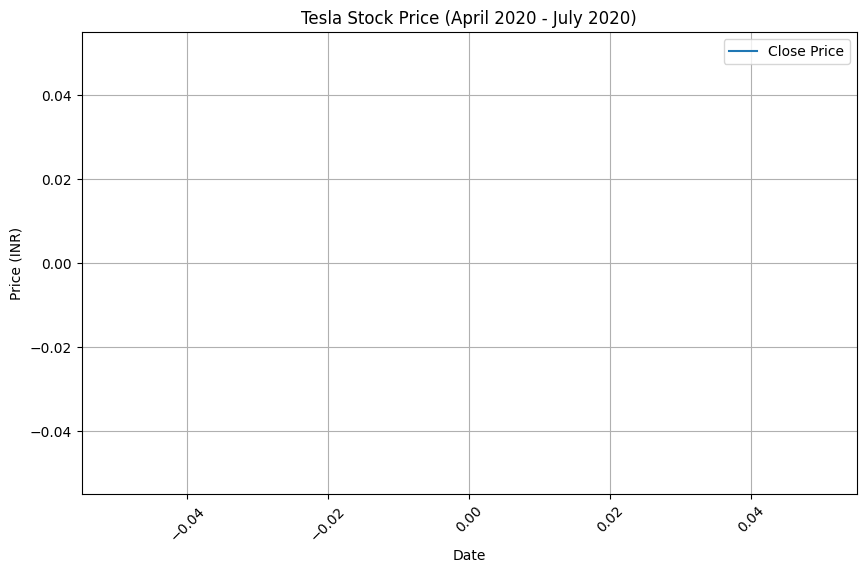

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for RIL
ticker_symbol = 'RIL'

# Define the time period from April 1, 2020, to July 31, 2020
start_date = '2020-04-01'
end_date = '2020-07-31'

# Fetch historical stock data from Yahoo Finance
tesla_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plotting the closing price of Tesla stock
plt.figure(figsize=(10, 6))
plt.plot(tesla_stock_data['Close'], label='Close Price')
plt.title('Tesla Stock Price (April 2020 - July 2020)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


(1351, 6)
                           time     open     high      low    close   volume
1350  2020-04-30 15:25:00+05:30  1451.05  1452.25  1447.45  1450.55   424512
1349  2020-04-30 15:20:00+05:30  1460.40  1460.40  1449.30  1451.15   574580
1348  2020-04-30 15:15:00+05:30  1455.70  1461.30  1455.40  1460.50   559432
1347  2020-04-30 15:10:00+05:30  1448.55  1456.10  1448.55  1455.70   692809
1346  2020-04-30 15:05:00+05:30  1453.00  1456.10  1448.85  1449.25   678692
...                         ...      ...      ...      ...      ...      ...
4     2020-04-01 09:35:00+05:30  1073.50  1079.60  1072.35  1077.45   288720
3     2020-04-01 09:30:00+05:30  1074.75  1074.80  1071.00  1073.50   207538
2     2020-04-01 09:25:00+05:30  1075.40  1075.65  1072.95  1074.80   354328
1     2020-04-01 09:20:00+05:30  1083.80  1084.70  1073.60  1075.45   682827
0     2020-04-01 09:15:00+05:30  1111.70  1113.90  1075.90  1083.65  1245800

[1351 rows x 6 columns]
(1425, 6)
                           time

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature Selection
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Logistic Regression
Test: 0.5769230769230769
Train: 0.6013937282229965
[[336 623]
 [158 729]]

SVM
Test: 0.5276273022751896
Train: 0.6102206736353077
[[655 304]
 [568 319]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC
Test: 0.6652221018418202
Train: 0.718931475029036
[[496 463]
 [155 732]]
Linear Poly
Test: 0.504875406283857
Train: 0.6072009291521486
[[408 551]
 [363 524]]

(4290, 15, 43) (1831, 15, 43)
(4290,) (1831,)


<ipython-input-8-51c633e40e5d>:294: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_train_y[ind] = y_train[ind + lb]
<ipython-input-8-51c633e40e5d>:297: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_test_y[ind] = y_test[ind + lb]


ModuleNotFoundError: No module named 'keras.layers.recurrent'

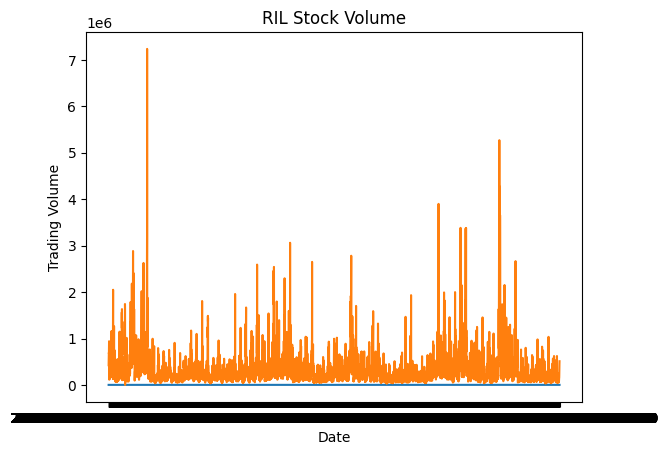

In [ ]:
# -*- coding: utf-8 -*-
"""final_project.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ClaCoQRLaalMtp9CM7WNjkT8IJ688Ij7
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Merge April, May, June 5-min Dataset

df0 = pd.read_csv("RIL_5min_April20.csv")
# flipping the data row-wise to arrange in ascending timeframe
df0 = df0.sort_index(axis=0, ascending=False)
print(df0.shape)
print(df0)

df1 = pd.read_csv("RIL_5min_May20.csv")
df1 = df1.sort_index(axis=0, ascending=False)
print(df1.shape)
print(df1)

df2 = pd.read_csv("RIL_5min_June20.csv")
df2 = df2.sort_index(axis=0, ascending=False)
print(df2.shape)
print(df2)

df3 = pd.read_csv("RIL_5min_July20.csv")
df3 = df3.sort_index(axis=0, ascending=False)
print(df3.shape)
print(df3)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
df_fig = df.copy(deep=True)
df[['Date', 'Time']] = df.time.str.split(expand=True)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[5], axis=1)
timeList = np.array(df['Time'])
for i in range(len(timeList)):
    temp = timeList[i]
    temp = temp[:2] + temp[3:5]
    timeList[i] = int(temp)
print(timeList)
df['Time'] = timeList
print(df)
print(df_fig)

import matplotlib.pyplot as plt

plt.plot(df_fig['time'], df_fig['close'])
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("RIL Stock Price")
plt.plot()

plt.plot(df_fig['volume'])
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("RIL Stock Volume")
plt.plot()

print(df_fig['volume'])

# Calculate Average Price per instance
low_price = np.array(df['low'])
high_price = np.array(df['high'])
avg_price = []
for low, high in zip(low_price, high_price):
    avg = (low + high) / 2
    avg_price.append(round(avg, 3))
print(len(avg_price))
df['Avg Price'] = avg_price
print(df)

def buildSMA(price, gap):
    l = len(price)
    arr = np.zeros(l)
    for i in range(gap, l):
        arr[i] = sum(price[i - gap:i]) / gap
        arr[i] = round(arr[i], 3)
    return arr

def buildCross(lowMA, highMA):
    l = len(lowMA)
    arr = np.zeros(l)
    i = 0
    for low_i, high_i in zip(lowMA, highMA):
        if low_i > high_i:
            # upward momentum (long signal)
            arr[i] = 1
        elif low_i < high_i:
            # downward momentum (short signal)
            arr[i] = -1
        i += 1
    return arr

def addlabel(price):
    l = len(price)
    arr = np.zeros(l)
    for i in range(l - 1):
        if price[i] < price[i + 1]:
            arr[i] = 1
    return arr

#%%
maList = [5, 8, 13, 21, 55, 89, 150, 200]
# List of potential moving averages
for i in range(len(maList)):
    gap = maList[i]
    s = str(gap) + '-MA'
    df[s] = buildSMA(avg_price, gap)
print(df)

# Build MA Crossovers
count = 0
for i in range(len(maList)):
    for j in range(i + 1, len(maList)):
        count += 1
        s1 = str(maList[i]) + '-MA'
        s2 = str(maList[j]) + '-MA'
        s3 = str(maList[i]) + "/" + str(maList[j]) + "Cross"
        lowMA = df[s1]
        highMA = df[s2]
        df[s3] = buildCross(lowMA, highMA)
print(df)
print(count)
df['label'] = addlabel(avg_price)
df.to_csv("data.csv", index=False)

avg_price = np.array(df['Avg Price'])
df_ = df
label = df_['label'].to_numpy()
df_ = df_.drop(df_.columns[-1], axis=1)
data = df_.to_numpy()
print(data.shape, label.shape)
# print(data[6])

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import preprocessing
data = preprocessing.scale(data)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(data, label)
temp = sel_.get_support()
print('Feature Selection')
print(temp)

#print(data.shape)

def portfolio_evaluation(arr_pred, amount, price):
    arr_amount = []
    arr_nstock = []
    N = len(arr_pred)
    for i in range(N):
        if i == 0:
            arr_amount.append(amount)
        arr_amount.append(0)
        arr_nstock.append(0)
    state = 0
    # state-> 0 (No Trading Position)
    # state-> 1 (Long Trading Position)
    # state-> -1 (Short Trading Position)
    for i in range(N):
        if state == 0:
            if arr_pred[i] == 1:
                # Open Long Position
                if i == 0:
                    temp_amount = arr_amount[i]
                    arr_amount[i] = 0
                    arr_nstock[i] = temp_amount / price[i]
                else:
                    arr_amount[i] = 0
                    arr_nstock[i] = arr_amount[i - 1] / price[i]
                state = 1
            else:
                # Open Short Position
                if i == 0:
                    arr_nstock[i] = -1 * arr_amount[i] / price[i]
                    arr_amount[i] -= price[i] * arr_nstock[i]
                else:
                    arr_nstock[i] = -1 * arr_amount[i - 1] / price[i]
                    arr_amount[i] = arr_amount[i - 1] - price[i] * arr_nstock[i]
                state = -1
        elif state == 1 and arr_pred[i] == 0:
            # Exit Long Position & Open Short Position
            temp_nstock = arr_nstock[i]
            arr_nstock[i] = 0
            arr_amount[i] = price[i] * arr_nstock[i - 1] + arr_amount[i - 1]
            # Short again
            arr_nstock[i] = -1 * arr_amount[i] / price[i]
            arr_amount[i] = arr_amount[i - 1] - price[i] * arr_nstock[i]
            state = -1
        elif state == -1 and arr_pred[i] == 1:
            # Exit Short Position & Open Long Position
            temp_nstock = arr_nstock[i]
            arr_nstock[i] = 0
            arr_amount[i] = price[i] * arr_nstock[i - 1] + arr_amount[i - 1]
            # Long again
            arr_nstock[i] = arr_amount[i] / price[i]
            arr_amount[i] = 0
            state = 1
    out = []
    for i in range(N):
        out.append(arr_amount[i] + price[i] * arr_nstock[i])
    return out

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

trainsize = int(data.shape[0] * 0.70)

X_train = data[:trainsize, :]
X_test = data[trainsize:, :]

y_train = label[:trainsize]
y_test = label[trainsize:]


#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Logistic Regression')
print('Test:', clf.score(X_test, y_test))
print('Train:', clf.score(X_train, y_train))

print(confusion_matrix(y_test, clf.predict(X_test)))
print()

# print(portfolio_evaluation(clf.predict(X_test),1000,avg_price[trainsize:]))

clf = svm.SVC()
clf.fit(X_train, y_train)

print('SVM')
print('Test:', clf.score(X_test, y_test))
print('Train:', clf.score(X_train, y_train))
print(confusion_matrix(y_test, clf.predict(X_test)))

from sklearn.svm import LinearSVC

clf = svm.LinearSVC()
clf.fit(X_train, y_train)
print('Linear SVC')
print('Test:', clf.score(X_test, y_test))
print('Train:', clf.score(X_train, y_train))

print(confusion_matrix(y_test, clf.predict(X_test)))

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
print('Linear Poly')
print('Test:', clf.score(X_test, y_test))
print('Train:', clf.score(X_train, y_train))

print(confusion_matrix(y_test, clf.predict(X_test)))
print()

from sklearn.preprocessing import MinMaxScaler

# RNN Models

#LSTM Model

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
y_train = y_train.reshape(-1, 1)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = y_test.reshape(-1, 1)
scaler.fit(y_test)
y_test = scaler.transform(y_test)

lb = 15

lstm_train_x = np.zeros(shape=(X_train.shape[0] - lb, lb, X_train.shape[1]))
lstm_train_y = np.zeros(shape=(y_train.shape[0] - lb))
lstm_test_x = np.zeros(shape=(X_test.shape[0] - lb, lb, X_test.shape[1]))
lstm_test_y = np.zeros(shape=(y_test.shape[0] - lb))
for ind in range(lstm_train_x.shape[0]):
    lstm_train_x[ind, :, :] = X_train[ind:ind + lb, :]
    lstm_train_y[ind] = y_train[ind + lb]
for ind in range(lstm_test_x.shape[0]):
    lstm_test_x[ind, :, :] = X_test[ind:ind + lb, :]
    lstm_test_y[ind] = y_test[ind + lb]

print(lstm_train_x.shape, lstm_test_x.shape)
print(lstm_train_y.shape, lstm_test_y.shape)

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.callbacks import *

clf = Sequential()
clf.add(LSTM(units=150, input_shape=(lb, lstm_train_x.shape[2])))
clf.add(Dropout(0.2))
clf.add(Dense(units=1))

clf.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')
clf.fit(lstm_train_x, lstm_train_y, epochs=100, batch_size=100, callbacks=EarlyStopping(monitor='loss', mode='min'))

test_loss, test_acc = clf.evaluate(lstm_test_x, lstm_test_y)
train_loss, train_acc = clf.evaluate(lstm_train_x, lstm_train_y)
print("Single Layer LSTM")
print("Train accuracy", train_acc)
print("Test accuracy", test_acc)

clf = Sequential()
clf.add(LSTM(units=150, return_sequences=True, input_shape=(lb, lstm_train_x.shape[2])))
clf.add(Dropout(0.3))
clf.add(Activation('relu'))
clf.add(LSTM(units=100, return_sequences=True))
clf.add(Dropout(0.3))
clf.add(Activation('relu'))
clf.add(LSTM(units=100))
clf.add(Dropout(0.3))
clf.add(Dense(units=1))
clf.add(Activation('relu'))

clf.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')
clf.fit(lstm_train_x, lstm_train_y, epochs=100, batch_size=100, callbacks=EarlyStopping(monitor='loss', mode='min'))

test_loss, test_acc = clf.evaluate(lstm_test_x, lstm_test_y)
train_loss, train_acc = clf.evaluate(lstm_train_x, lstm_train_y)
print("Multi Layer LSTM")
print("Train accuracy", train_acc)
print("Test accuracy", test_acc)

from keras.layers.recurrent import GRU

clf = Sequential()
clf.add(GRU(units=150, input_shape=(lb, lstm_train_x.shape[2])))
clf.add(Dense(units=1))
clf.add(Activation('sigmoid'))
clf.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')
clf.fit(lstm_train_x, lstm_train_y, epochs=100, batch_size=100, callbacks=EarlyStopping(monitor='loss', mode='min'))
test_loss, test_acc = clf.evaluate(lstm_test_x, lstm_test_y)
train_loss, train_acc = clf.evaluate(lstm_train_x, lstm_train_y)
print("GRU :")
print("Train accuracy", train_acc)
print("Test accuracy", test_acc)


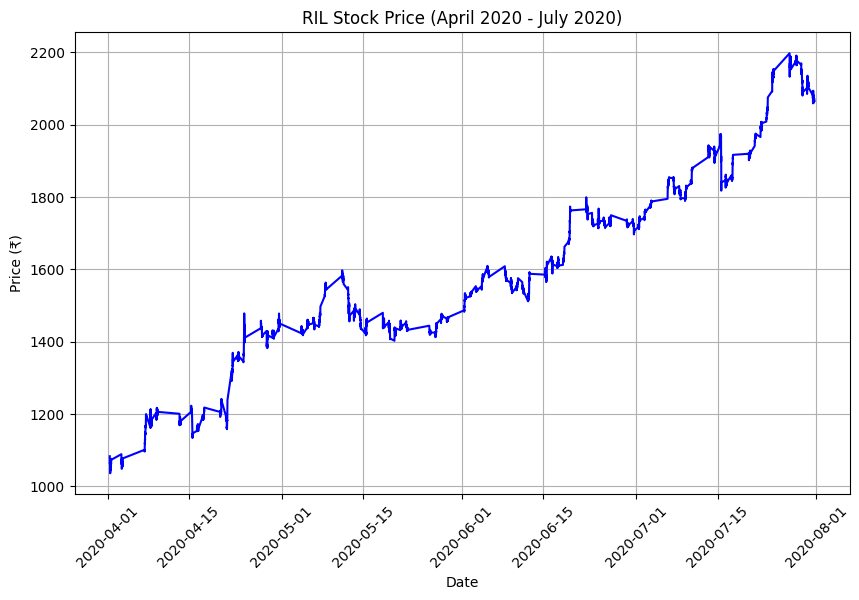

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file names containing the historical stock price data
file_names = ["RIL_5min_April20.csv", "RIL_5min_May20.csv", "RIL_5min_June20.csv", "RIL_5min_July20.csv"]

# Concatenate the data from all files into a single DataFrame
df_list = [pd.read_csv(file_name) for file_name in file_names]
df = pd.concat(df_list, ignore_index=True)

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Plot the closing price of RIL stock from April 2020 to July 2020
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['close'], color='blue')
plt.title('RIL Stock Price (April 2020 - July 2020)')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
